# The Battle of Neighborhoods - Capstone Project (Part 2)

# CHOICE OF NEIGHBORHOOD FOR AIRBNB STAY IN NEW YORK CITY

In [1]:
import numpy as np
import pandas as pd
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from sklearn.cluster import KMeans 
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from scipy.spatial.distance import cdist, pdist

print('Folium installed and imported!')


Folium installed and imported!


# Due to the large file size, only first 5000 rows are read and copied to the dataframe

In [2]:
df_airbnb = pd.read_csv('tomslee_airbnb_new_york_1438_2017-07-12.csv', nrows =5000)
df_airbnb.head()

room_id  survey_id   host_id    room_type  country      city    borough  \
0   7739955       1438  38614070  Shared room      NaN  New York     Queens   
1   7383173       1438  32628813  Shared room      NaN  New York   Brooklyn   
2  10250852       1438  35553123  Shared room      NaN  New York   Brooklyn   
3   2188359       1438   5029659  Shared room      NaN  New York  Manhattan   
4  19661354       1438  70038324  Shared room      NaN  New York  Manhattan   

      neighborhood  reviews  overall_satisfaction  ...  bedrooms  bathrooms  \
0  Jackson Heights        6                   5.0  ...       1.0        NaN   
1    Cypress Hills       14                   4.0  ...       1.0        NaN   
2   Sheepshead Bay        3                   4.5  ...       1.0        NaN   
3   Hell's Kitchen       35                   5.0  ...       1.0        NaN   
4  Upper East Side        0                   0.0  ...       1.0        NaN   

   price  minstay                                      name property_type  \
0   85.0      NaN           Room TO SHARE by DAY,week,month         House   
1   90.0      NaN         Spacious Room: Close to Manhattan         House   
2  239.0      NaN                                COZY COUCH     Apartment   
3  165.0      NaN         1 Bdrm Apt 1 Block from Times Sq.     Apartment   
4  159.0      NaN  NYC Upper East / Midtown East Luxury 1BR     Apartment   

                last_modified   latitude  longitude  \
0  2017-07-15 21:30:31.858764  40.749909 -73.876880   
1  2017-07-15 21:30:30.332828  40.678527 -73.889584   
2  2017-07-15 21:30:23.607950  40.583041 -73.957976   
3  2017-07-15 21:30:21.832749  40.758374 -73.991955   
4  2017-07-15 21:30:19.986579  40.761960 -73.959733   

                                            location  
0  0101000020E61000000EA14ACD1E7852C0F0FCA204FD5F...  
1  0101000020E6100000DFC2BAF1EE7852C0FC3905F9D956...  
2  0101000020E61000009696917A4F7D52C0139D6516A14A...  
3  0101000020E6100000A306D3307C7F52C0801134661261...  
4  0101000020E610000016F9F5436C7D52C01A6EC0E78761...  

[5 rows x 21 columns]

In [3]:
df_airbnb.shape

(5000, 21)

In [4]:
df_airbnb.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'property_type', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

# Cleaning data - Dropping columns

In [5]:
#dropping columns which are not required
df_newyork = df_airbnb.drop(columns =['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
        'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'property_type', 'last_modified', 'latitude', 'longitude', 'location'])

In [6]:
df_newyork.head()

borough     neighborhood
0     Queens  Jackson Heights
1   Brooklyn    Cypress Hills
2   Brooklyn   Sheepshead Bay
3  Manhattan   Hell's Kitchen
4  Manhattan  Upper East Side

In [7]:
df_newyork.insert(1, 'Count', '1')
df1 = df_newyork.groupby(['borough', 'neighborhood']).count()
df1.sort_values(by = 'Count', ascending = False, inplace = True)
df1

Count
borough       neighborhood             
Brooklyn      Williamsburg          415
Manhattan     Hell's Kitchen        283
              East Village          265
              Midtown               264
              Chelsea               257
              Upper West Side       252
              West Village          232
Brooklyn      Bedford-Stuyvesant    174
Manhattan     Upper East Side       169
              Harlem                149
              Lower East Side       136
              SoHo                  122
              Financial District    117
              Greenwich Village      96
Brooklyn      Crown Heights          90
              Clinton Hill           84
              Bushwick               81
Manhattan     Nolita                 81
              Kips Bay               79
Brooklyn      Park Slope             78
Manhattan     Tribeca                75
Brooklyn      Greenpoint             73
Manhattan     East Harlem            69
Brooklyn      Carroll Gardens        58
              Fort Greene            55
Manhattan     Chinatown              52
              Gramercy               51
              Theater District       47
              Washington Heights     46
              Murray Hill            42
...                                 ...
Staten Island Randall Manor           1
Bronx         Concourse Village       1
Staten Island South Beach             1
Bronx         Concourse               1
Staten Island Stapleton               1
Bronx         Claremont Village       1
Staten Island Westerleigh             1
Queens        South Ozone Park        1
Bronx         Spuyten Duyvil          1
              Pelham Bay Park         1
Queens        Holliswood              1
              Douglaston              1
              Belle Harbor            1
              Edgemere                1
Bronx         Bronxdale               1
Brooklyn      Navy Yard               1
Queens        Forest Park             1
Brooklyn      Mill Basin              1
              Manhattan Beach         1
              Bergen Beach            1
Bronx         Port Morris             1
Brooklyn      Bath Beach              1
Bronx         West Farms              1
              University Heights      1
Queens        Neponsit                1
              Queens Village          1
              Cambria Heights         1
Bronx         Schuylerville           1
              Riverdale               1
              Belmont                 1

[161 rows x 1 columns]

### Limiting the number of above rows to 20 for better visualization

In [12]:
df2 = df_newyork.groupby(['borough', 'neighborhood']).count()
df2.sort_values(by = 'Count', ascending = False, inplace = True)
df2 = df2[:20]

## Plotting neighborhood listings as bar graph

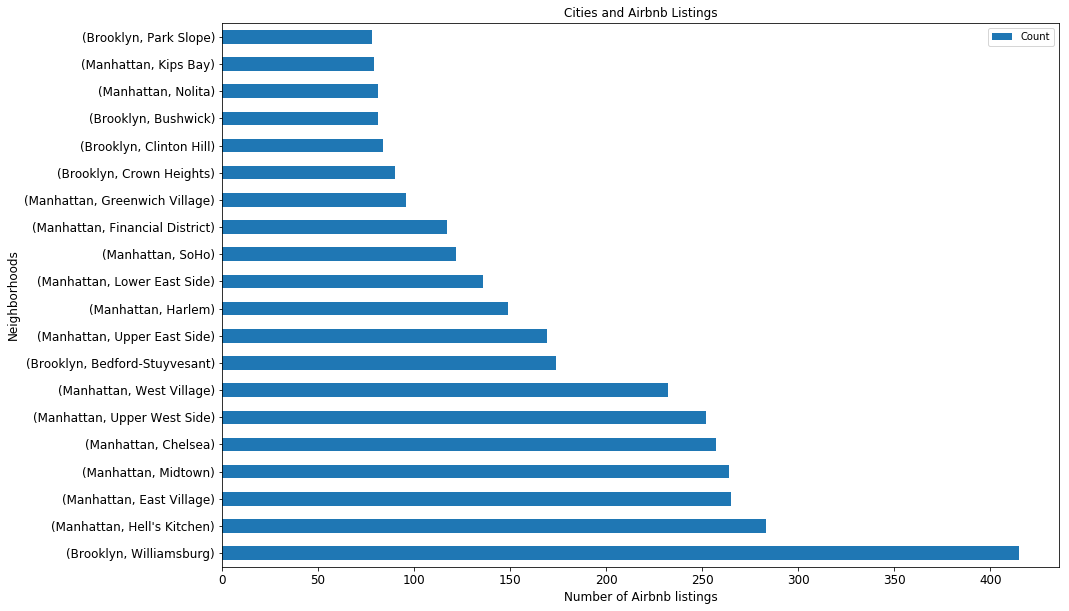

In [15]:
ax = df2.plot(kind='barh', title ="Cities and Airbnb Listings",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Number of Airbnb listings",fontsize=12)
ax.set_ylabel("Neighborhoods",fontsize=12)
ax.plot
plt.savefig('airbnb.png')

### From the above graph, it is clear that the maximum listings are in Brooklyn followed by Manhattan in Hell's Kitchen (283 listings) followed by East village, Midtown, Chelsea and upper west side

# Plotting New York map using Folium Libraries

In [17]:
address = 'New York, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York is 40.7308619, -73.9871558.


In [20]:
# create map using folium and displaying it
newyork_map = folium.Map(location=[latitude, longitude],tiles="cartodbpositron",zoom_start=12)

# display the map of New York
newyork_map

In [21]:
newyork_map.save('New_york.png')

# Plotting of all Airbnb properties in New York Area

In [22]:
# add all the point from the dataframe to the map object using FastMarkerCluster
newyork_map.add_child(FastMarkerCluster(df_airbnb[['latitude', 'longitude']].values.tolist()))

newyork_map

In [23]:
newyork_map.save('Airbnb_ny.png')

### From the map, it is evident that majority of the listings are based in Manhattan (densely located) and Brooklyn

## _____________________________________________________________________________________________________________________________________________________________________________________________

# Importing and analysing New York Crime data

#### NYC Crime data acquired from  NYC Open data (https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data)

In [24]:
newyork_crime = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')
newyork_crime.head()

CMPLNT_NUM  ADDR_PCT_CD    BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0   651421035         41.0      BRONX   11/28/2018     00:00:00   11/28/2018   
1   149013323         14.0  MANHATTAN   12/31/2018     23:40:00   12/31/2018   
2   642981531         73.0   BROOKLYN   12/31/2018     23:30:00   12/31/2018   
3   429685363         67.0   BROOKLYN   12/31/2018     23:20:00   12/31/2018   
4   290330841          5.0  MANHATTAN   12/31/2018     23:15:00   12/31/2018   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  SUSP_SEX  \
0     00:01:00        COMPLETED        NaN          NaN  ...         U   
1     23:50:00        COMPLETED        NaN          NaN  ...       NaN   
2     23:40:00        COMPLETED        NaN          NaN  ...         F   
3     23:30:00        COMPLETED        NaN          NaN  ...         M   
4     23:20:00        COMPLETED        NaN          NaN  ...         U   

  TRANSIT_DISTRICT  VIC_AGE_GROUP        VIC_RACE VIC_SEX X_COORD_CD  \
0              NaN          25-44           BLACK       M        NaN   
1              NaN          45-64           WHITE       F   987866.0   
2              NaN          18-24  WHITE HISPANIC       F  1006995.0   
3              NaN          25-44           BLACK       F   999584.0   
4              NaN          25-44           WHITE       M   986164.0   

  Y_COORD_CD   Latitude  Longitude                                  Lat_Lon  
0        NaN        NaN        NaN                                      NaN  
1   214721.0  40.756044 -73.986950  (40.75604353500006, -73.98694954399997)  
2   185258.0  40.675146 -73.918003  (40.67514616200003, -73.91800323399997)  
3   169903.0  40.633016 -73.944756  (40.63301598000004, -73.94475559899996)  
4   202140.0  40.721512 -73.993096  (40.72151233500005, -73.99309646799998)  

[5 rows x 35 columns]

In [25]:
newyork_crime.shape

(464065, 35)

In [26]:
newyork_crime.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon'],
      dtype='object')

## Data Cleansing by dropping columns

In [27]:
newyork_crime = newyork_crime.drop(columns = ['CMPLNT_NUM', 'ADDR_PCT_CD', 'CMPLNT_FR_TM',
       'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
        'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon'], axis =1)

In [28]:
newyork_crime.head()

BORO_NM CMPLNT_FR_DT CMPLNT_TO_DT                       OFNS_DESC  \
0      BRONX   11/28/2018   11/28/2018                      SEX CRIMES   
1  MANHATTAN   12/31/2018   12/31/2018                   GRAND LARCENY   
2   BROOKLYN   12/31/2018   12/31/2018    ASSAULT 3 & RELATED OFFENSES   
3   BROOKLYN   12/31/2018   12/31/2018  CRIMINAL MISCHIEF & RELATED OF   
4  MANHATTAN   12/31/2018   12/31/2018    ASSAULT 3 & RELATED OFFENSES   

                                   PD_DESC   Latitude  Longitude  
0                         SEXUAL ABUSE 3,2        NaN        NaN  
1  LARCENY,GRAND FROM PERSON, BAG OPEN/DIP  40.756044 -73.986950  
2                                ASSAULT 3  40.675146 -73.918003  
3         CRIMINAL MISCHIEF,UNCLASSIFIED 4  40.633016 -73.944756  
4                                ASSAULT 3  40.721512 -73.993096

### Dropping rows containing NaN values

In [30]:
newyork_crime = newyork_crime.dropna(axis =0)

### Including count column for counting the number of offenses in each neighborhood

In [48]:
newyork_crime.insert(6, 'Count','1')

#Grouping the Crime statistics by type of crime
nycrimedata = newyork_crime.groupby(['BORO_NM', 'OFNS_DESC']).count()

nycrimedata

CMPLNT_FR_DT  \
BORO_NM       OFNS_DESC                                            
BRONX         ADMINISTRATIVE CODE                            213   
              AGRICULTURE & MRKTS LAW-UNCLASSIFIED            26   
              ALCOHOLIC BEVERAGE CONTROL LAW                  25   
              ANTICIPATORY OFFENSES                            1   
              ARSON                                          182   
              ASSAULT 3 & RELATED OFFENSES                 10580   
              BURGLAR'S TOOLS                                 25   
              BURGLARY                                      2099   
              CHILD ABANDONMENT/NON SUPPORT                    8   
              CRIMINAL MISCHIEF & RELATED OF                8135   
              CRIMINAL TRESPASS                              428   
              DANGEROUS DRUGS                               3814   
              DANGEROUS WEAPONS                             1551   
              DISORDERLY CONDUCT                               5   
              ENDAN WELFARE INCOMP                             5   
              ESCAPE 3                                         2   
              FELONY ASSAULT                                4338   
              FORGERY                                        635   
              FRAUDS                                         227   
              FRAUDULENT ACCOSTING                            36   
              GAMBLING                                         8   
              GRAND LARCENY                                 5213   
              GRAND LARCENY OF MOTOR VEHICLE                1188   
              HARRASSMENT 2                                11469   
              HOMICIDE-NEGLIGENT,UNCLASSIFIE                   1   
              INTOXICATED & IMPAIRED DRIVING                 643   
              INTOXICATED/IMPAIRED DRIVING                     2   
              JOSTLING                                         7   
              KIDNAPPING                                       2   
              KIDNAPPING & RELATED OFFENSES                   26   
...                                                          ...   
STATEN ISLAND FELONY ASSAULT                                 525   
              FORGERY                                         89   
              FRAUDS                                         159   
              GRAND LARCENY                                 1057   
              GRAND LARCENY OF MOTOR VEHICLE                 180   
              HARRASSMENT 2                                 3840   
              HOMICIDE-NEGLIGENT,UNCLASSIFIE                   1   
              INTOXICATED & IMPAIRED DRIVING                 692   
              INTOXICATED/IMPAIRED DRIVING                     2   
              KIDNAPPING                                       1   
              KIDNAPPING & RELATED OFFENSES                    4   
              MISCELLANEOUS PENAL LAW                        636   
              NYS LAWS-UNCLASSIFIED FELONY                    35   
              NYS LAWS-UNCLASSIFIED VIOLATION                  1   
              OFF. AGNST PUB ORD SENSBLTY &                 1019   
              OFFENSES AGAINST PUBLIC ADMINI                 398   
              OFFENSES AGAINST PUBLIC SAFETY                   3   
              OFFENSES AGAINST THE PERSON                     34   
              OFFENSES INVOLVING FRAUD                        32   
              OTHER OFFENSES RELATED TO THEF                  55   
              OTHER STATE LAWS (NON PENAL LA                  15   
              PETIT LARCENY                                 2973   
              PETIT LARCENY OF MOTOR VEHICLE                   2   
              POSSESSION OF STOLEN PROPERTY                   59   
              RAPE                                            60   
              ROBBERY                                        300   
              SEX CRIMES                

In [49]:
nycrimedata.sort_values(by = 'Count', ascending = False, inplace = True)

nycrimedata1 = nycrimedata.drop(columns =['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'PD_DESC', 'Latitude','Longitude'], axis = 1)

nycrimedata1

Count
BORO_NM       OFNS_DESC                             
MANHATTAN     PETIT LARCENY                    23849
BROOKLYN      PETIT LARCENY                    22181
              HARRASSMENT 2                    18363
MANHATTAN     GRAND LARCENY                    14836
QUEENS        PETIT LARCENY                    14761
BROOKLYN      ASSAULT 3 & RELATED OFFENSES     13576
QUEENS        HARRASSMENT 2                    12720
BROOKLYN      CRIMINAL MISCHIEF & RELATED OF   12622
BRONX         PETIT LARCENY                    12444
MANHATTAN     HARRASSMENT 2                    12083
BRONX         HARRASSMENT 2                    11469
              ASSAULT 3 & RELATED OFFENSES     10580
BROOKLYN      GRAND LARCENY                    10461
QUEENS        ASSAULT 3 & RELATED OFFENSES      9772
MANHATTAN     ASSAULT 3 & RELATED OFFENSES      9499
QUEENS        CRIMINAL MISCHIEF & RELATED OF    9222
BRONX         CRIMINAL MISCHIEF & RELATED OF    8135
MANHATTAN     CRIMINAL MISCHIEF & RELATED OF    8023
QUEENS        GRAND LARCENY                     7396
BROOKLYN      FELONY ASSAULT                    5616
              OFF. AGNST PUB ORD SENSBLTY &     5473
BRONX         GRAND LARCENY                     5213
BROOKLYN      MISCELLANEOUS PENAL LAW           4663
BRONX         FELONY ASSAULT                    4338
BROOKLYN      DANGEROUS DRUGS                   4143
MANHATTAN     OFF. AGNST PUB ORD SENSBLTY &     3990
BROOKLYN      BURGLARY                          3868
STATEN ISLAND HARRASSMENT 2                     3840
BROOKLYN      ROBBERY                           3839
BRONX         DANGEROUS DRUGS                   3814
...                                              ...
BROOKLYN      ANTICIPATORY OFFENSES                2
QUEENS        OTHER STATE LAWS                     2
MANHATTAN     OTHER STATE LAWS                     2
QUEENS        DISORDERLY CONDUCT                   2
BROOKLYN      NEW YORK CITY HEALTH CODE            2
STATEN ISLAND BURGLAR'S TOOLS                      2
BROOKLYN      ESCAPE 3                             2
MANHATTAN     INTOXICATED/IMPAIRED DRIVING         1
              KIDNAPPING                           1
QUEENS        DISRUPTION OF A RELIGIOUS SERV       1
              ANTICIPATORY OFFENSES                1
BRONX         ANTICIPATORY OFFENSES                1
MANHATTAN     ESCAPE 3                             1
BROOKLYN      INTOXICATED/IMPAIRED DRIVING         1
MANHATTAN     HOMICIDE-NEGLIGENT-VEHICLE           1
STATEN ISLAND KIDNAPPING                           1
              NYS LAWS-UNCLASSIFIED VIOLATION      1
QUEENS        JOSTLING                             1
              KIDNAPPING                           1
BRONX         OTHER STATE LAWS                     1
STATEN ISLAND HOMICIDE-NEGLIGENT,UNCLASSIFIE       1
MANHATTAN     HOMICIDE-NEGLIGENT,UNCLASSIFIE       1
BRONX         HOMICIDE-NEGLIGENT,UNCLASSIFIE       1
BROOKLYN      UNLAWFUL POSS. WEAP. ON SCHOOL       1
STATEN ISLAND DISORDERLY CONDUCT                   1
BRONX         NYS LAWS-UNCLASSIFIED VIOLATION      1
STATEN ISLAND CHILD ABANDONMENT/NON SUPPORT        1
BROOKLYN      ABORTION                             1
BRONX         OFFENSES RELATED TO CHILDREN         1
QUEENS        UNLAWFUL POSS. WEAP. ON SCHOOL       1

[258 rows x 1 columns]

In [50]:
nycrimedata2 = newyork_crime.drop(columns =['CMPLNT_FR_DT', 'CMPLNT_TO_DT','OFNS_DESC', 'PD_DESC', 'Latitude', 'Longitude'], axis=1)
nycrimedata2 = nycrimedata2.groupby(['BORO_NM']).count()

nycrimedata2.sort_values(by = 'Count', ascending = False, inplace = True)
nycrimedata2

Count
BORO_NM              
BROOKLYN       123076
MANHATTAN       99094
QUEENS          82063
BRONX           76477
STATEN ISLAND   18015

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8060ff56a0>>

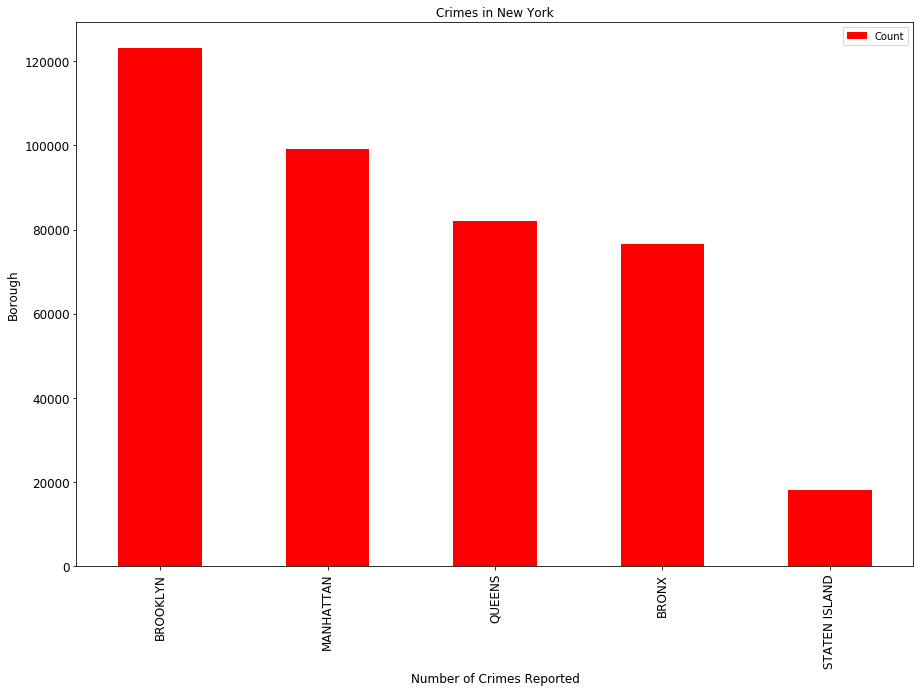

In [51]:
import matplotlib.pyplot as plt
ax2 = nycrimedata2.plot(kind='bar', title ="Crimes in New York",figsize=(15,10), color = 'red', legend=True, fontsize=12)
ax2.set_xlabel("Borough",fontsize=12)
ax2.set_ylabel("Number of Crimes Reported",fontsize=12)
ax2.plot


### The above graph shows that Brooklyn has the maximum number of crimes reported, followed by Manhattan

# Due to the high number of reported crimes, random 500 crimes are plotted on the Folium map

In [66]:
nycrime_subset = newyork_crime.sample(n=500)

In [68]:
crime_map = folium.Map(location=[latitude, longitude],tiles="cartodbpositron",zoom_start=12)



# Overlay heatmap of NYC Crime on New York_map

# ___________________________________________________________________________________________________

In [70]:
# Ensure you're handing it floats
nycrime_subset['Latitude'] = nycrime_subset['Latitude'].astype(float)
nycrime_subset['Longitude'] = nycrime_subset['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
ny_crime = nycrime_subset[['Latitude', 'Longitude']]


# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in nycrime_subset.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(crime_map)

# Display the map
crime_map

In [84]:
crime_map.save('ny_crime.png')

## Exploring venues in New york using Foursquare APIs

### Defining Foursquare Credentials and Version

In [75]:
CLIENT_ID = 'HMYPEA4A11L2JZ3NU2F4E1YJJXBBADH2GNZUYFBUQ4T5ROQJ' # your Foursquare ID
CLIENT_SECRET = '323B1WTMB0FNLDUKRU4GPKXXLMHJOFZRETE2W0CUCRZGYZQV' # your Foursquare Secret
VERSION = '20180604'
radius = 10000
LIMIT = 500
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: HMYPEA4A11L2JZ3NU2F4E1YJJXBBADH2GNZUYFBUQ4T5ROQJ
CLIENT_SECRET:323B1WTMB0FNLDUKRU4GPKXXLMHJOFZRETE2W0CUCRZGYZQV


In [76]:
import json

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize



# JSON file downloaded from link https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
with open('nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
print('New York City data imported.')

# Create empty new york data pandas DataFrame
ny_neighborhoods = pd.DataFrame(columns=['Borough', 'Neighborhood', 'Latitude', 'Longitude'])

# Populate ny_neighborhoods_df with new york imported json data
for data in newyork_data['features']:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                                'Neighborhood': neighborhood_name,
                                                'Latitude': neighborhood_lat,
                                                'Longitude': neighborhood_lon}, 
                                                ignore_index=True)
print('Pandas DataFrame populated with New York City data.')

# Export data do csv file
ny_neighborhoods.to_csv('ny_neighborhoods.csv', sep=',', encoding='utf-8')

ny_neighborhoods.tail()

New York City data imported.
Pandas DataFrame populated with New York City data.


Borough  Neighborhood   Latitude  Longitude
301      Manhattan  Hudson Yards  40.756658 -74.000111
302         Queens       Hammels  40.587338 -73.805530
303         Queens     Bayswater  40.611322 -73.765968
304         Queens  Queensbridge  40.756091 -73.945631
305  Staten Island     Fox Hills  40.617311 -74.081740

In [77]:
colnames = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
ny_neighborhoods = pd.read_csv('ny_neighborhoods.csv', skiprows=1, names=colnames)
ny_neighborhoods.tail()

Borough  Neighborhood   Latitude  Longitude
301      Manhattan  Hudson Yards  40.756658 -74.000111
302         Queens       Hammels  40.587338 -73.805530
303         Queens     Bayswater  40.611322 -73.765968
304         Queens  Queensbridge  40.756091 -73.945631
305  Staten Island     Fox Hills  40.617311 -74.081740

In [78]:
address = 'New york, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7308619 -73.9871558


### Exploring neighborhoods in New York by defining FOURSQUARE API URL

In [79]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=HMYPEA4A11L2JZ3NU2F4E1YJJXBBADH2GNZUYFBUQ4T5ROQJ&client_secret=323B1WTMB0FNLDUKRU4GPKXXLMHJOFZRETE2W0CUCRZGYZQV&ll=40.7900869,-73.9598295&v=20180604&radius=1000&limit=500'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=HMYPEA4A11L2JZ3NU2F4E1YJJXBBADH2GNZUYFBUQ4T5ROQJ&client_secret=323B1WTMB0FNLDUKRU4GPKXXLMHJOFZRETE2W0CUCRZGYZQV&ll=40.7900869,-73.9598295&v=20180604&radius=1000&limit=500'

In [80]:
def getNearbyVenues(names, latitudes, longitudes,limit =500, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            latitude, 
            longitude, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [81]:
import requests
print('Importing New York neighborhoods nearby venues using Foursquare...')
# Get data from Foursquare
newyork_venues = getNearbyVenues(names=ny_neighborhoods['Neighborhood'],
                            latitudes=ny_neighborhoods['Latitude'],
                            longitudes=ny_neighborhoods['Longitude'],
                            )

print('The "newyork_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(newyork_venues['Venue Category']),
      len(newyork_venues['Venue Category'].unique())))
newyork_venues.to_csv('ny_venues.csv', sep=',', encoding='UTF8')
newyork_venues.head()

Importing New York neighborhoods nearby venues using Foursquare...
Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mil

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.730862              -73.987156   
1    Wakefield              40.730862              -73.987156   
2    Wakefield              40.730862              -73.987156   
3    Wakefield              40.730862              -73.987156   
4    Wakefield              40.730862              -73.987156   

                          Venue  Venue Latitude  Venue Longitude  \
0              Sake Bar Decibel       40.729416       -73.987745   
1             Momofuku Ssäm Bar       40.731711       -73.985571   
2                   Han Dynasty       40.732130       -73.988090   
3  Hi-Collar - ハイカラ (Hi-Collar)       40.729449       -73.985918   
4            Casey Rubber Stamp       40.729962       -73.985098   

        Venue Category  
0             Sake Bar  
1     Asian Restaurant  
2   Chinese Restaurant  
3          Coffee Shop  
4  Arts & Crafts Store

In [82]:
# Loading above data from the saved .csv file prepared

colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
newyork_venues = pd.read_csv('ny_venues.csv', skiprows=1, names=colnames)
newyork_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.730862              -73.987156   
1    Wakefield              40.730862              -73.987156   
2    Wakefield              40.730862              -73.987156   
3    Wakefield              40.730862              -73.987156   
4    Wakefield              40.730862              -73.987156   

                          Venue  Venue Latitude  Venue Longitude  \
0              Sake Bar Decibel       40.729416       -73.987745   
1             Momofuku Ssäm Bar       40.731711       -73.985571   
2                   Han Dynasty       40.732130       -73.988090   
3  Hi-Collar - ハイカラ (Hi-Collar)       40.729449       -73.985918   
4            Casey Rubber Stamp       40.729962       -73.985098   

        Venue Category  
0             Sake Bar  
1     Asian Restaurant  
2   Chinese Restaurant  
3          Coffee Shop  
4  Arts & Crafts Store

In [83]:
newyork_venues.shape

(30600, 7)

In [100]:
#newyork_map.add_child(FastMarkerCluster(newyork_venues[['Venue Latitude', 'Venue Longitude']].values.tolist()))

#newyork_map

### Cleaning dataset to get the Venue types and Count

In [85]:
newyork_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)
newyork_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                               
Allerton                              100                     100    100   
Annadale                              100                     100    100   
Arden Heights                         100                     100    100   
Arlington                             100                     100    100   
Arrochar                              100                     100    100   
Arverne                               100                     100    100   
Astoria                               100                     100    100   
Astoria Heights                       100                     100    100   
Auburndale                            100                     100    100   
Bath Beach                            100                     100    100   
Battery Park City                     100                     100    100   
Bay Ridge                             100                     100    100   
Bay Terrace                           200                     200    200   
Baychester                            100                     100    100   
Bayside                               100                     100    100   
Bayswater                             100                     100    100   
Bedford Park                          100                     100    100   
Bedford Stuyvesant                    100                     100    100   
Beechhurst                            100                     100    100   
Bellaire                              100                     100    100   
Belle Harbor                          100                     100    100   
Bellerose                             100                     100    100   
Belmont                               100                     100    100   
Bensonhurst                           100                     100    100   
Bergen Beach                          100                     100    100   
Blissville                            100                     100    100   
Bloomfield                            100                     100    100   
Boerum Hill                           100                     100    100   
Borough Park                          100                     100    100   
Breezy Point                          100                     100    100   
...                                   ...                     ...    ...   
Travis                                100                     100    100   
Tribeca                               100                     100    100   
Tudor City                            100                     100    100   
Turtle Bay                            100                     100    100   
Unionport                             100                     100    100   
University Heights                    100                     100    100   
Upper East Side                       100                     100    100   
Upper West Side                       100                     100    100   
Utopia                                100                     100    100   
Van Nest                              100                     100    100   
Vinegar Hill                          100                     100    100   
Wakefield                             100                     100    100   
Washington Heights                    100                     100    100   
Weeksville                            100                     100    100   
West Brighton                         100                     100    100   
West Farms                            100                     100    100   
West Village                          100                     100    100   
Westchester Square                    100                     100    100   
Westerleigh                           100                     100    100   
Whitestone                            100                     100   

## The majority of Venues in Manhattan include Restaurants, Coffee & Icecream Shops

In [86]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 67 uniques categories.


In [87]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(newyork_onehot.columns)

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
newyork_onehot = newyork_onehot[column_names]

newyork_onehot.head()

Neighborhood  American Restaurant  Arepa Restaurant  Arts & Crafts Store  \
0    Wakefield                    0                 0                    0   
1    Wakefield                    0                 0                    0   
2    Wakefield                    0                 0                    0   
3    Wakefield                    0                 0                    0   
4    Wakefield                    0                 0                    1   

   Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  Bar  Beer Store  ...  \
0                 0          0           0       0    0           0  ...   
1                 1          0           0       0    0           0  ...   
2                 0          0           0       0    0           0  ...   
3                 0          0           0       0    0           0  ...   
4                 0          0           0       0    0           0  ...   

   Theater  Toy / Game Store  Udon Restaurant  Ukrainian Restaurant  \
0        0                 0                0                     0   
1        0                 0                0                     0   
2        0                 0                0                     0   
3        0                 0                0                     0   
4        0                 0                0                     0   

   Vegetarian / Vegan Restaurant  Video Game Store  Vietnamese Restaurant  \
0                              0                 0                      0   
1                              0                 0                      0   
2                              0                 0                      0   
3                              0                 0                      0   
4                              0                 0                      0   

   Wine Bar  Wine Shop  Yoga Studio  
0         0          0            0  
1         0          0            0  
2         0          0            0  
3         0          0            0  
4         0          0            0  

[5 rows x 68 columns]

## Filtering Restaurant data from above dataset (considering as one of the major points of interest for travelers)

In [88]:
restaurant_List = []
search = 'Restaurant'
for i in newyork_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [89]:
restaurant_List

['American Restaurant',
 'Arepa Restaurant',
 'Asian Restaurant',
 'Chinese Restaurant',
 'Greek Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Moroccan Restaurant',
 'Ramen Restaurant',
 'Seafood Restaurant',
 'Soba Restaurant',
 'Spanish Restaurant',
 'Szechuan Restaurant',
 'Tapas Restaurant',
 'Udon Restaurant',
 'Ukrainian Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant']

In [90]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
newyork_restaurant = newyork_onehot[col_name]
#manhattan_restaurant = manhattan_restaurant.iloc[:,1::]

In [91]:
newyork_restaurant.head()

Neighborhood  American Restaurant  Arepa Restaurant  Asian Restaurant  \
0    Wakefield                    0                 0                 0   
1    Wakefield                    0                 0                 1   
2    Wakefield                    0                 0                 0   
3    Wakefield                    0                 0                 0   
4    Wakefield                    0                 0                 0   

   Chinese Restaurant  Greek Restaurant  Italian Restaurant  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   1                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   Japanese Restaurant  Korean Restaurant  Mediterranean Restaurant  ...  \
0                    0                  0                         0  ...   
1                    0                  0                         0  ...   
2                    0                  0                         0  ...   
3                    0                  0                         0  ...   
4                    0                  0                         0  ...   

   Ramen Restaurant  Seafood Restaurant  Soba Restaurant  Spanish Restaurant  \
0                 0                   0                0                   0   
1                 0                   0                0                   0   
2                 0                   0                0                   0   
3                 0                   0                0                   0   
4                 0                   0                0                   0   

   Szechuan Restaurant  Tapas Restaurant  Udon Restaurant  \
0                    0                 0                0   
1                    0                 0                0   
2                    0                 0                0   
3                    0                 0                0   
4                    0                 0                0   

   Ukrainian Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  
0                     0                              0                      0  
1                     0                              0                      0  
2                     0                              0                      0  
3                     0                              0                      0  
4                     0                              0                      0  

[5 rows x 22 columns]

In [92]:
newyork_restaurant_grouped = newyork_restaurant.groupby('Neighborhood').sum().reset_index()
newyork_restaurant_grouped['Total'] = newyork_restaurant_grouped .sum(axis=1)

# Clustering Neighborhoods and examining clusters

## *Finding the right number of clusters using elbow method*

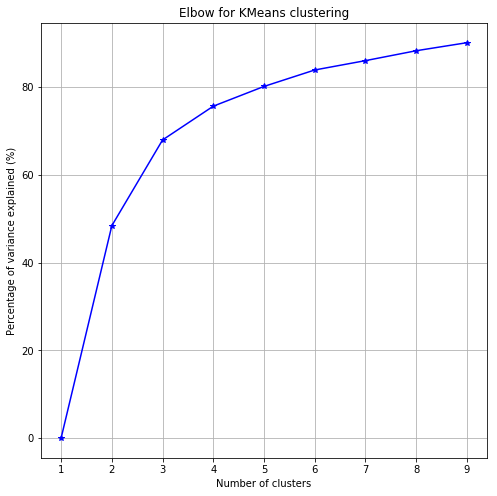

In [97]:
X = newyork_venues[['Venue Latitude', 'Venue Longitude']].values
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X) for i in Ks]
def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X)

In [100]:
kclusters = 2   #(optimized value after iterations, Not shown here)

newyork_grouped_clustering = newyork_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
newyork_results = pd.DataFrame(kmeans.cluster_centers_)
newyork_results.columns = newyork_grouped_clustering.columns
newyork_results.index = ['cluster0','cluster1']
newyork_results['Total Sum'] = newyork_results.sum(axis = 1)
newyork_results

American Restaurant  Arepa Restaurant  Asian Restaurant  \
cluster0                  1.0               1.0               1.0   
cluster1                  2.0               2.0               2.0   

          Chinese Restaurant  Greek Restaurant  Italian Restaurant  \
cluster0                 3.0               1.0                 1.0   
cluster1                 6.0               2.0                 2.0   

          Japanese Restaurant  Korean Restaurant  Mediterranean Restaurant  \
cluster0                  3.0                2.0                       1.0   
cluster1                  6.0                4.0                       2.0   

          Mexican Restaurant  ...  Soba Restaurant  Spanish Restaurant  \
cluster0                 2.0  ...              1.0                 1.0   
cluster1                 4.0  ...              2.0                 2.0   

          Szechuan Restaurant  Tapas Restaurant  Udon Restaurant  \
cluster0                  1.0               1.0              1.0   
cluster1                  2.0               2.0              2.0   

          Ukrainian Restaurant  Vegetarian / Vegan Restaurant  \
cluster0                   1.0                            3.0   
cluster1                   2.0                            6.0   

          Vietnamese Restaurant  Total  Total Sum  
cluster0                    2.0   33.0       66.0  
cluster1                    4.0   66.0      132.0  

[2 rows x 23 columns]

## The total and Total Sum of Cluster 0 has smaller value which means Cluster 2 has more Venues (Points of Interest)

### Dataframe with neighborhood, Cluster sum and Cluster No.

In [102]:
newyork_results_merged = pd.DataFrame(newyork_restaurant_grouped['Neighborhood'])

newyork_results_merged['Total'] = newyork_restaurant_grouped['Total']
newyork_results_merged = newyork_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [103]:
print(newyork_results_merged.shape)
newyork_results_merged

(302, 3)


Neighborhood  Total  Cluster_Labels
0              Allerton     33               0
1              Annadale     33               0
2         Arden Heights     33               0
3             Arlington     33               0
4              Arrochar     33               0
5               Arverne     33               0
6               Astoria     33               0
7       Astoria Heights     33               0
8            Auburndale     33               0
9            Bath Beach     33               0
10    Battery Park City     33               0
11            Bay Ridge     33               0
12          Bay Terrace     66               1
13           Baychester     33               0
14              Bayside     33               0
15            Bayswater     33               0
16         Bedford Park     33               0
17   Bedford Stuyvesant     33               0
18           Beechhurst     33               0
19             Bellaire     33               0
20         Belle Harbor     33               0
21            Bellerose     33               0
22              Belmont     33               0
23          Bensonhurst     33               0
24         Bergen Beach     33               0
25           Blissville     33               0
26           Bloomfield     33               0
27          Boerum Hill     33               0
28         Borough Park     33               0
29         Breezy Point     33               0
..                  ...    ...             ...
272              Travis     33               0
273             Tribeca     33               0
274          Tudor City     33               0
275          Turtle Bay     33               0
276           Unionport     33               0
277  University Heights     33               0
278     Upper East Side     33               0
279     Upper West Side     33               0
280              Utopia     33               0
281            Van Nest     33               0
282        Vinegar Hill     33               0
283           Wakefield     33               0
284  Washington Heights     33               0
285          Weeksville     33               0
286       West Brighton     33               0
287          West Farms     33               0
288        West Village     33               0
289  Westchester Square     33               0
290         Westerleigh     33               0
291          Whitestone     33               0
292      Williamsbridge     33               0
293        Williamsburg     33               0
294         Willowbrook     33               0
295     Windsor Terrace     33               0
296             Wingate     33               0
297           Woodhaven     33               0
298            Woodlawn     33               0
299             Woodrow     33               0
300            Woodside     33               0
301           Yorkville     33               0

[302 rows x 3 columns]

In [105]:
newyork_merged = ny_neighborhoods

newyork_merged = newyork_merged.join(newyork_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(newyork_merged.shape)
newyork_merged.head(10) 

(306, 6)


Borough    Neighborhood   Latitude  Longitude  Total  Cluster_Labels
0      Bronx       Wakefield  40.894705 -73.847201     33               0
1      Bronx      Co-op City  40.874294 -73.829939     33               0
2      Bronx     Eastchester  40.887556 -73.827806     33               0
3      Bronx       Fieldston  40.895437 -73.905643     33               0
4      Bronx       Riverdale  40.890834 -73.912585     33               0
5      Bronx     Kingsbridge  40.881687 -73.902818     33               0
6  Manhattan     Marble Hill  40.876551 -73.910660     33               0
7      Bronx        Woodlawn  40.898273 -73.867315     33               0
8      Bronx         Norwood  40.877224 -73.879391     33               0
9      Bronx  Williamsbridge  40.881039 -73.857446     33               0

In [106]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [109]:
map_clusters.save ('ny_clusters.png')

## With the available dataset, after clustering, the neighborhoods Manhattan, Brooklyn, Queens, Bronx and Parts of Staten Island fall under cluster 1 having higher and uniform density of Venues (in comparison with Cluster 0)